# Case study on Pre-processing



Do the following on titanic dataset.

1. Load the dataset into python environment

2. Make ‘PassengerId’ as the index column

3. Check the basic details of the dataset

4. Fill in all the missing values present in all the columns in the dataset

5. Check and handle outliers in at least 3 columns in the dataset

6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [166]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

# 1. Load the dataset into python environment

In [167]:
 #Loading the dataset
data = pd.read_csv("F:\\pythonprogramming\\titanic_dataset.csv")
data.head(10)   

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [168]:
#Printing the dataset
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2.  Make ‘PassengerId’ as the index column

In [169]:
data.set_index('PassengerId', inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3.  Check the basic details of the dataset

In [170]:
data.shape

(891, 11)

In [171]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [172]:
# To verify null data items
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [173]:
data.info()#prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Insights :

There are 891 rows and 12 columns in the given dataset .

The column 'age' contains 177 null values, the column 'Cabin' contains 687 null values and 'Embarked' columns contains 2 null values.

# 4.  Fill in all the missing values present in all the columns in the dataset

In [174]:
# Dropping the columns 'Cabin','Name','Ticket'
#The column Cabin has 687 null values. So we can drop cabin column as it is having more than 20 % null values.
data.drop(['Cabin','Name','Ticket'],axis = 1,inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


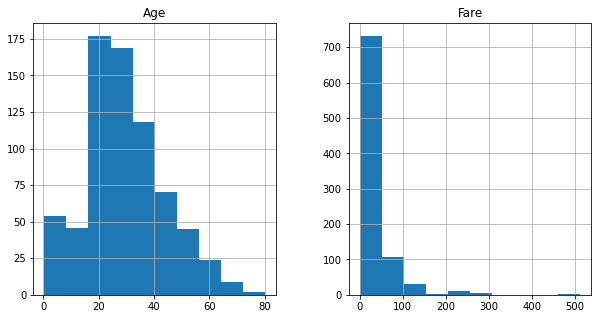

In [123]:
#To find skewness
freqgraph = data.select_dtypes(include = ['float'])
freqgraph.hist(figsize= (10,5))
plt.show()

In [124]:
#Fill in the missing values of age column with median as age is right-skewed
data['Age'].fillna(data['Age'].median(), inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [125]:
#Fill in the missing values of Embarked column with mode 
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# 5.  Check and handle outliers in at least 3 columns in the dataset

a) To check for any outliers in the column 'age'

Text(0.5, 1.0, 'Box plot of Age')

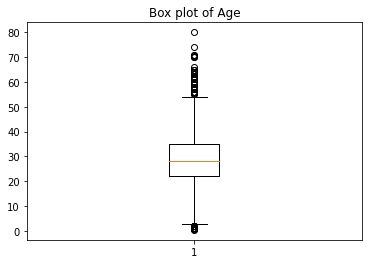

In [126]:
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

In [127]:
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Age'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

In [128]:
print(Q1)
print(Q2)
print(Q3)

22.0
28.0
35.0


In [129]:
data['Age'].median()

28.0

In [130]:
#Finding IQR
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print('The lower limit is : ', low_lim)
print('The upper limit is : ', upp_lim)

The lower limit is :  2.5
The upper limit is :  54.5


In [131]:
# To remove all the values below 2.5 and above 54.5
outlier = []
for x in data['Age']:
    if ((x >  upp_lim) or (x < low_lim)):
        outlier.append(x)
        

In [132]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [133]:
# To find the index of the upper limit outliers 
index1 = data['Age'] > upp_lim
data.loc[index1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [134]:
# To drop these outliers 
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880], inplace=True)

In [135]:
# To find the index of the lower limit outliers 
index1 = data['Age'] < low_lim
data.loc[index1].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [136]:
# To drop these outliers 
data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832], inplace=True)

Text(0.5, 1.0, 'Box plot of Age')

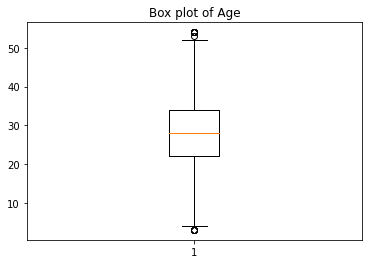

In [137]:
#To check if outliers are handled
plt.boxplot(data['Age'])
plt.title('Box plot of Age')

b) To check for any outliers in the column 'SibSp'

Text(0.5, 1.0, 'Box plot of SibSp')

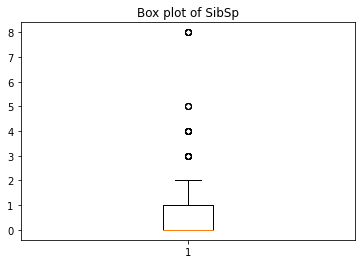

In [138]:
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

In [139]:
Q1 = np.percentile(data['SibSp'], 25, interpolation='midpoint')
Q2 = np.percentile(data['SibSp'], 50, interpolation='midpoint')
Q3 = np.percentile(data['SibSp'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [140]:
data['SibSp'].median()

0.0

In [141]:
#Finding IQR
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print('The lower limit is : ', low_lim)
print('The upper limit is : ', upp_lim)

The lower limit is :  -1.5
The upper limit is :  2.5


In [142]:
# To remove all the values below -1.5 and above 2.5
outlier = []
for x in data['SibSp']:
    if ((x >  upp_lim) or (x < low_lim)):
        outlier.append(x)
        

In [143]:
outlier

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [144]:
# To find the index of the upper limit outliers (here no values less than lower limit)
index1 = data['SibSp'] > upp_lim
data.loc[index1].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [145]:
# To drop these outliers 
data.drop([  25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864], inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

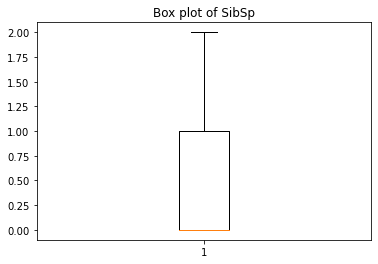

In [146]:
#To check if outliers are handled
plt.boxplot(data['SibSp'])
plt.title('Box plot of SibSp')

c) To check for any outliers in the column 'Fare'

Text(0.5, 1.0, 'Box plot of Fare')

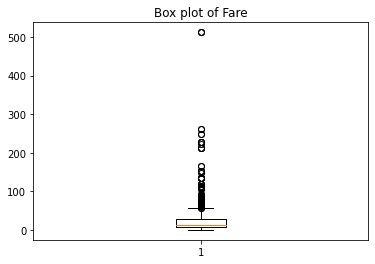

In [147]:
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

In [148]:
Q1 = np.percentile(data['Fare'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Fare'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Fare'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

7.8958
13.0
27.75


In [149]:
data['Fare'].median()

13.0

In [150]:
#Finding IQR
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
print('The lower limit is : ', low_lim)
print('The upper limit is : ', upp_lim)

The lower limit is :  -21.885499999999997
The upper limit is :  57.5313


In [151]:
# To remove all the values below -1.5 and above 2.5
outlier = []
for x in data['Fare']:
    if ((x >  upp_lim) or (x < low_lim)):
        outlier.append(x)

In [152]:
outlier

[71.2833,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 61.175,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 61.3792,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 135.6333,
 57.9792,
 153.4625,
 133.65,
 66.6,
 134.5,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 59.4,
 93.5,
 57.9792,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 120.0,
 93.5,
 83.1583,
 89.1042,
 164.8667]

In [153]:
# To find the index of the upper limit outliers (here no values less than lower limit)
index1 = data['Fare'] > upp_lim
data.loc[index1].index

Int64Index([  2,  32,  35,  53,  62,  63,  73,  93,  98, 103,
            ...
            760, 764, 766, 780, 790, 803, 821, 836, 850, 857],
           dtype='int64', name='PassengerId', length=102)

In [154]:
# To drop these outliers 
index = data[(data['Fare'] > up_lim)|(data['Fare'] < low_lim)].index
data.drop(index, inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

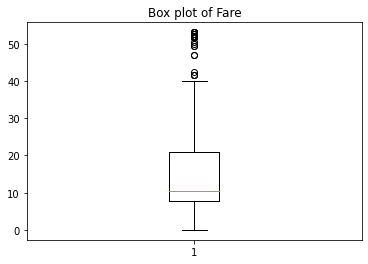

In [155]:
#To check if outliers are handled
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')

Insights:  Checked and handled the outliers in columns 'age', 'SibSp' and 'Fare' of the given dataset

# 6.  Do min max scaling on the feature set (Take ‘Survived’ as target)

In [156]:
#Converting categorical variable 'Sex' into numerical 
# Label Encoding
label = preprocessing.LabelEncoder() 
data['Sex']= label.fit_transform(data['Sex']) 
print(data['Sex'].unique())

[1 0]


In [157]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S
6,0,3,1,28.0,0,0,8.4583,Q


In [158]:
#Converting categorical variable 'Embarked' into numerical 
# One Hot Encoding
data_edummies=pd.get_dummies(data['Embarked'])
data=pd.concat([data, data_edummies], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
PassengerId,,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S,0,0,1
3,1,3,0,26.0,0,0,7.9250,S,0,0,1
4,1,1,0,35.0,1,0,53.1000,S,0,0,1
5,0,3,1,35.0,0,0,8.0500,S,0,0,1
6,0,3,1,28.0,0,0,8.4583,Q,0,1,0


In [159]:
# dropping the column 'Embarked'

data.drop('Embarked', axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
PassengerId,,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,0,1
3,1,3,0,26.0,0,0,7.9250,0,0,1
4,1,1,0,35.0,1,0,53.1000,0,0,1
5,0,3,1,35.0,0,0,8.0500,0,0,1
6,0,3,1,28.0,0,0,8.4583,0,1,0


In [160]:
y=data["Survived"]
x=data.drop(["Survived"],axis=1)

In [161]:
x.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,2.519461,0.690120,28.559880,0.269461,0.270958,15.359948,0.145210,0.101796,0.752994
std,0.699911,0.462791,9.455459,0.501119,0.762656,11.118349,0.352576,0.302607,0.431593
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,23.000000,0.000000,0.000000,7.854200,0.000000,0.000000,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,10.500000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,33.000000,0.000000,0.000000,21.000000,0.000000,0.000000,1.000000
max,3.000000,1.000000,54.000000,2.000000,6.000000,53.100000,1.000000,1.000000,1.000000


In [162]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(x)
x=pd.DataFrame(x)

In [163]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.759731,0.690120,0.501174,0.134731,0.045160,0.289265,0.145210,0.101796,0.752994
std,0.349956,0.462791,0.185401,0.250559,0.127109,0.209385,0.352576,0.302607,0.431593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.392157,0.000000,0.000000,0.147913,0.000000,0.000000,1.000000
50%,1.000000,1.000000,0.490196,0.000000,0.000000,0.197740,0.000000,0.000000,1.000000
75%,1.000000,1.000000,0.588235,0.000000,0.000000,0.395480,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train, y_train)
predictions=model.predict(x_test)
#To find the efficiency of our regression model by finding MSE
from sklearn.metrics import mean_squared_error
print('MSE is : ', mean_squared_error(y_test, predictions))
#To find the efficiency of our regression model by finding R^2 Value
from sklearn.metrics import r2_score
print('R squared value is : ', r2_score(y_test, predictions))

MSE is :  0.14823693785396666
R squared value is :  0.34245492685132783


Insights:  Taking 'Survived' as target, performed min-max scaling...MSE value is 0.14823693785396666 which is very low, so that our model is good